In [303]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

코랩 사용하시는 분들은 아래의 코드를 실행해주세요!

In [304]:
# from google.colab import drive
# drive.mount('/content/drive')

In [305]:
# import os
# os.getcwd()

코랩 사용시 본인 구글 드라이브 경로는  
/content/drive/MyDrive/...  
입니다.

In [306]:
# path = './drive/MyDrive/...'    # 과제 데이터셋이 저장된 경로를 더 작성해주세요
# os.chdir(path)

In [307]:
# os.getcwd()

사용할 데이터 셋 :  전력 사용량 예측 모델

아래의 과정에서 sklearn의 Pipeline의 사용은 필수는 아닙니다. 선호와 필요에 따라 사용하실 분들은 사용하셔도 좋습니다.

# 데이터

건물 정보와 기후 정보를 활용한 전력사용량 예측 데이터 중에서 

환경 변수(기온, 풍속, 습도, 강수량, 일조)에 대해 전력 사용량을 선형회귀 모델을 사용해서 예측해보고자 합니다.

In [308]:
var_name = ['Temp', 'Wind', 'Moisture', 'Precipitation', 'Sun']
target = 'Wh'

In [309]:
def parsing(data: pd.DataFrame):
    x = data.iloc[:, 3:8]
    x.columns = var_name
    y = data.iloc[:, 2]
    y.name = target
    
    return x, y

In [310]:
def load_data():
    data = pd.read_csv('data/train.csv', encoding='cp949')
    data = data[: 100]
    x, y = parsing(data)    
    cut = int(round(len(x)*0.88))
    tr_x = x[:cut]
    tr_y = y[:cut]
    te_x = x[cut:]
    te_y = y[cut:]
    return tr_x, tr_y, te_x, te_y

In [311]:
train_x, train_y, test_x, test_y = load_data()

## 데이터 확인 

주의! 최종 예측하는 단계 이전에는 현재 가지고 있는 데이터, 즉 train data만을 이용하여 작업을 진행해야 합니다.

현재 가지고 있는 데이터 train_x를 보고 전력 사용량을 예측하는데에 사용할 변수를 선택해주세요.

기초세션에서 다뤘던 내용을 참고하셔서 최적의 변수 조합을 찾아보도록 합시다.

이 때 선택해야하는 변수는 하나일 수도 있고, 여러개의 변수를 사용하여도 좋습니다.

In [312]:
# 데이터 셋을 둘러보는 코드 작성하시고, 왜 좋은지 한번 둘러보세요!
train_x.head()

,Temp,Wind,Moisture,Precipitation,Sun
0,17.6,2.5,92.0,0.8,0.0
1,17.7,2.9,91.0,0.3,0.0
2,17.5,3.2,91.0,0.0,0.0
3,17.1,3.2,91.0,0.0,0.0
4,17.0,3.3,92.0,0.0,0.0


In [313]:
train_y.head()

0    8179.056
1    8135.640
2    8107.128
3    8048.808
4    8043.624
Name: Wh, dtype: float64

In [314]:
train_x['Wh'] = train_y
train_x.head()

,Temp,Wind,Moisture,Precipitation,Sun,Wh
0,17.6,2.5,92.0,0.8,0.0,8179.056
1,17.7,2.9,91.0,0.3,0.0,8135.640
2,17.5,3.2,91.0,0.0,0.0,8107.128
3,17.1,3.2,91.0,0.0,0.0,8048.808
4,17.0,3.3,92.0,0.0,0.0,8043.624


<AxesSubplot:>

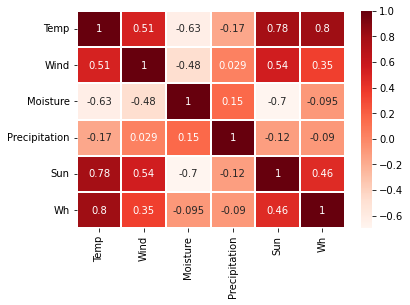

In [315]:
import seaborn as sns

sns.heatmap(train_x.corr(), annot = True, cmap='Reds', linewidth=2)

Wh와 높은 상관관계를 보이는 변수로는 Temp, Sun, 그리고 Wind가 있다.  
Wh와 각각의 관계를 더 자세히 알아보자.  

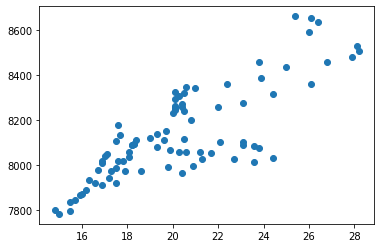

In [316]:
plt.scatter(train_x.Temp, train_x.Wh)
plt.show()

Wh와 Temp 사이에는 어느 정도의 선형 관계가 보인다.  

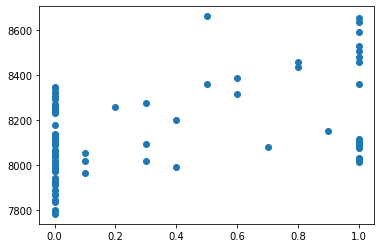

In [317]:
plt.scatter(train_x.Sun, train_x.Wh)
plt.show()

Wh와 Sun 사이에는 유의미한 관계가 보이지 않는다.  

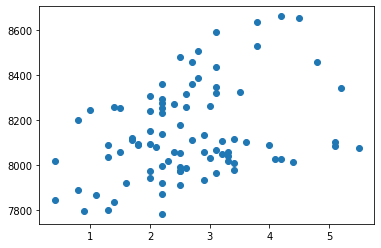

In [318]:
plt.scatter(train_x.Wind, train_x.Wh)
plt.show()

Wh와 Wind 사이에도 유의미한 관계가 보이지 않는다.  

정답은 없습니다! 

다만 최종 선택한 변수(들)이 왜 선택받았는지 간단히 알려주세요.<br>
답변 : Wh와 상관관계가 가장 높으며, 선형 관계가 보이는 Temp를 선택

## 전처리

위에서 선택한 변수들(feature)를 가지고 한번 전력 사용량을 예측하는 모델을 만들어 보기에 앞서,

**train 데이터의 feature의 전처리**를 진행해보려고 합니다. StandardScaler를 사용하셔도 좋고, MinMaxScaler를 사용하셔도 좋습니다! 

또한 PolynomialFeatures를 이용하거나 직접 feature를 계산하여 고차원의 feature를 만드셔도 좋습니다. 이 또한 정답은 없습니다!

이 때 최종 train_x의 shape은 (n_samples, n_features)가 되도록 해주세요.<br>
ex. 4개의 변수를 가진 1000개의 샘플의 경우 train_x.shape은 (1000,4)가 되면 됩니다.

특히 하나의 변수만을 사용하시는 분들은 1D가 아닌 2D가 되도록 신경써주세요<br>
ex. train_x.shape이 (1000,)이 아닌 (1000,1)입니다!

In [319]:
# 사용할 패키지를 import!
from sklearn.preprocessing import StandardScaler

In [320]:
train_x = train_x['Temp']
train_x = np.array(train_x)
train_x = train_x[:, np.newaxis]
train_x.shape

(88, 1)

In [321]:
train_x[:10]

array([[17.6],
       [17.7],
       [17.5],
       [17.1],
       [17. ],
       [16.9],
       [16.7],
       [16.9],
       [17.8],
       [19.3]])

In [322]:
scaler = StandardScaler()
scaler = scaler.fit(train_x)
train_x = scaler.transform(train_x)
train_x[:10]

array([[-0.80942259],
       [-0.77879955],
       [-0.84004563],
       [-0.96253778],
       [-0.99316082],
       [-1.02378386],
       [-1.08502994],
       [-1.02378386],
       [-0.74817651],
       [-0.28883093]])

In [323]:
train_x[-10:]

array([[-0.04384662],
       [-0.04384662],
       [-0.04384662],
       [ 0.10926857],
       [ 0.66048327],
       [ 1.11982885],
       [ 1.45668227],
       [ 1.76291266],
       [ 1.88540481],
       [ 1.57917443]])

# 모델링

## 학습 

이제 모델링을 해봅시다.

앞서 다룬 여러 regression 모델들(Linear regression, Ridge Regression, Lasso Regression, ..)을 이용해서 fit을 진행해보도록 합시다.

In [324]:
# 사용할 패키지를 import!
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [325]:
# 선형회귀 모델 생성 후 fitting 시킵니다.

# LinearRegression
LR_model = LinearRegression().fit(train_x, train_y)

LR_beta = LR_model.coef_[0]
LR_intercept = LR_model.intercept_
print(f'Beta: {LR_beta:.4f}')
print(f'Intercept: {LR_intercept:.4f}')


Beta: 162.6602
Intercept: 8142.1863


In [326]:
# Ridge
Ridge_model = Ridge().fit(train_x, train_y)

Ridge_beta = Ridge_model.coef_[0]
Ridge_intercept = Ridge_model.intercept_
print(f'Beta: {Ridge_beta:.4f}')
print(f'Intercept: {Ridge_intercept:.4f}')

Beta: 160.8326
Intercept: 8142.1863


In [327]:
# Lasso
Lasso_model = Lasso().fit(train_x, train_y)

Lasso_beta = Lasso_model.coef_[0]
Lasso_intercept = Lasso_model.intercept_
print(f'Beta: {Lasso_beta:.4f}')
print(f'Intercept: {Lasso_intercept:.4f}')

Beta: 161.6602
Intercept: 8142.1863


## 추정

이제 train_x를 이용하여 전력사용량을 추정해보도록 합시다.

In [328]:
LR_esti_y = LR_model.predict(train_x)
Ridge_esti_y = Ridge_model.predict(train_x)
Lasso_esti_y = Lasso_model.predict(train_x)
print(train_y.shape)
print(LR_esti_y.shape)
print(Ridge_esti_y.shape)
print(Lasso_esti_y.shape)

(88,)
(88,)
(88,)
(88,)


# Loss 및 시각화

앞서 fitting하여 얻은 모델을 이용하여 추정한 값으로 MSE를 측정해봅시다. 변수를 하나만 사용하신 분들은 xy 평면에 한번 같이 시각화도 해보셔도 좋습니다.

In [329]:
def mse(pred, true):
    return np.mean((pred-true)**2)

In [330]:
LR_train_mse = mse(LR_esti_y, train_y)
print(f'LR MSE: {LR_train_mse:.4f}')
Ridge_train_mse = mse(Ridge_esti_y, train_y)
print(f'Ridge MSE: {Ridge_train_mse:.4f}')
Lasso_train_mse = mse(Lasso_esti_y, train_y)
print(f'Lasso MSE: {Lasso_train_mse:.4f}')

LR MSE: 14543.7583
Ridge MSE: 14547.0986
Lasso MSE: 14544.7583


In [331]:
def visualize(model, x, y):
    if x.shape[1] != 1:
        return None
    beta = model.coef_[0]
    intercept = model.intercept_
    
    x_axis = np.linspace(np.min(x), np.max(x), 100)
    fit = intercept * x_axis**0 + beta*x_axis 

    plt.figure(figsize=(8,6))
    plt.plot(x_axis, fit, label='Predict', c='r', linewidth=3)
    plt.scatter(x, y, c='blue')
    plt.legend()
    plt.show()

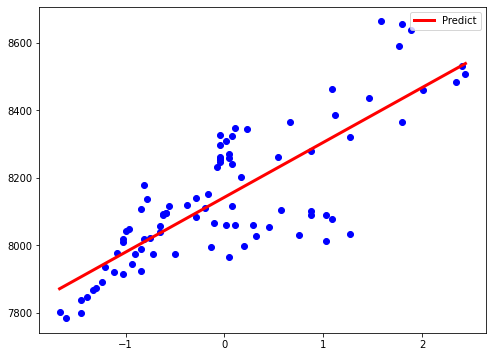

In [332]:
# visualization 하실 분은 진행해주세요!

# LinearRegression
visualize(LR_model, train_x, train_y)

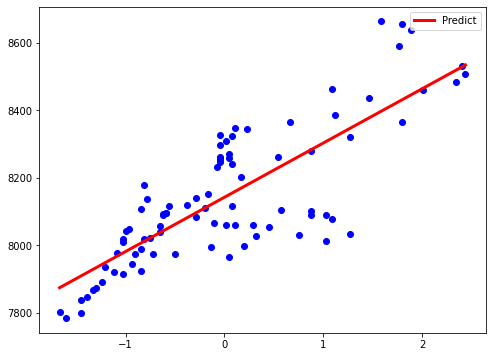

In [333]:
# Ridge
visualize(Ridge_model, train_x, train_y)

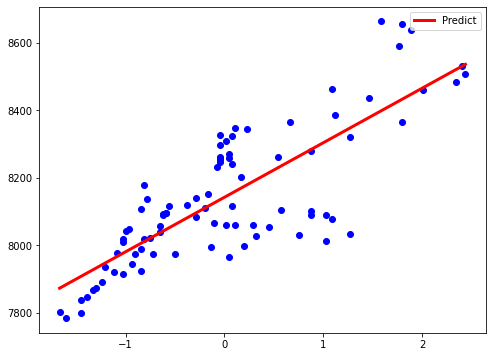

In [334]:
# Lasso
visualize(Lasso_model, train_x, train_y)

# 예측

테스트셋에 대해서 한번 **예측**해보도록 합시다.

이미 fitting된 모델 (그리고 scaler를 사용하신다면 scaler)에 대해 **fit을 하지 말고** 단순히 predict만 진행해보도록 합시다. 

scaler는 transform만 하시고 model은 predict을 진행해주세요

In [335]:
# transform을 하시는 분들은 실행해주세요
test_x.head()

,Temp,Wind,Moisture,Precipitation,Sun
88,24.3,3.6,70.0,0.0,0.0
89,23.2,4.1,75.0,0.0,0.1
90,22.8,3.1,77.0,0.0,0.2
91,21.7,3.3,80.0,0.0,0.0
92,21.4,2.5,83.0,0.0,0.0


In [336]:
test_y.head()

88    8671.536
89    8652.096
90    8626.176
91    8665.704
92    8646.264
Name: Wh, dtype: float64

In [337]:
test_x = test_x['Temp']
test_x = np.array(test_x)
test_x = test_x[:, np.newaxis]
test_x.shape

(12, 1)

In [338]:
test_x = scaler.transform(test_x)
test_x

array([[ 1.242321  ],
       [ 0.90546758],
       [ 0.78297542],
       [ 0.446122  ],
       [ 0.35425288],
       [ 0.17051465],
       [ 0.01739945],
       [-0.1050927 ],
       [-0.16633878],
       [-0.22758486],
       [-0.28883093],
       [-0.28883093]])

In [339]:
# y1_hat에 predict값 할당
LR_pred_y = LR_model.predict(test_x)
Ridge_pred_y = Ridge_model.predict(test_x)
Lasso_pred_y = Lasso_model.predict(test_x)
print(LR_pred_y)
print(Ridge_pred_y)
print(Lasso_pred_y)
print(test_y)

[8344.26245576 8289.46981005 8269.54521161 8214.75256591 8199.80911708
 8169.92221942 8145.01647137 8125.09187293 8115.12957371 8105.16727449
 8095.20497527 8095.20497527]
[8341.99193685 8287.81493885 8268.1142123  8213.9372143  8199.16166939
 8169.61057957 8144.98467138 8125.28394484 8115.43358156 8105.58321829
 8095.73285502 8095.73285502]
[8343.02013476 8288.56434248 8268.76223619 8214.30644391 8199.4548642
 8169.75170477 8144.99907192 8125.19696563 8115.29591249 8105.39485935
 8095.4938062  8095.4938062 ]
88    8671.536
89    8652.096
90    8626.176
91    8665.704
92    8646.264
93    8659.872
94    8657.280
95    8604.144
96    8598.960
97    8573.040
98    8561.376
99    8549.064
Name: Wh, dtype: float64


# 성능 평가

한번 학습한 모델에 대해 test_y를 이용하여 mse loss를 측정해도도록 합시다.

In [340]:
def score(train_mse, test_mse):
    print(f"{test_mse/train_mse: .4f}")

---
## LinearRegression

In [341]:
LR_test_mse = mse(LR_pred_y, test_y)
print(f"LR MSE: {LR_test_mse:.4f}")

LR MSE: 198060.5218


In [342]:
score(LR_train_mse, LR_test_mse)

 13.6182


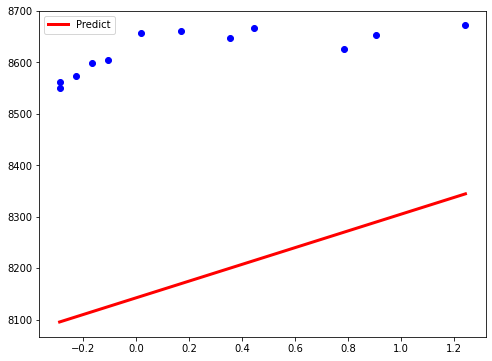

In [344]:
# visualization 하실 분은 진행해주세요!
visualize(LR_model, test_x, test_y)

LinearRegression Model을 사용했는데, 결과가 좋지 않다.  

---
## Ridge

In [345]:
Ridge_test_mse = mse(Ridge_pred_y, test_y)
print(f"Ridge MSE: {Ridge_test_mse:.4f}")

Ridge MSE: 198354.8308


In [346]:
score(Ridge_train_mse, Ridge_test_mse)

 13.6354


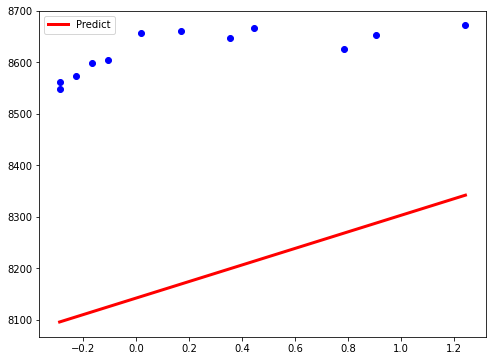

In [347]:
# visualization 하실 분은 진행해주세요!
visualize(Ridge_model, test_x, test_y)

Ridge Model의 경우에도 결과가 좋지 않다.  

---
## Lasso

In [348]:
Lasso_test_mse = mse(Lasso_pred_y, test_y)
print(f"Lasso MSE: {Lasso_test_mse:.4f}")

Lasso MSE: 198221.3064


In [349]:
score(Lasso_train_mse, Lasso_test_mse)

 13.6284


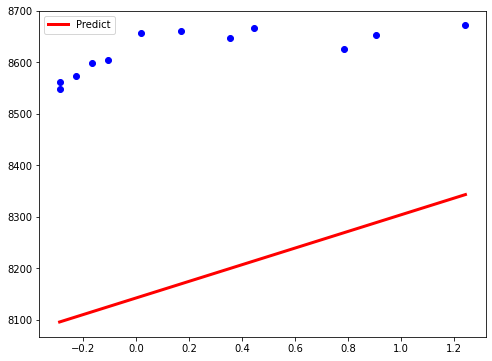

In [350]:
# visualization 하실 분은 진행해주세요!
visualize(Lasso_model, test_x, test_y)

Lasso Model도 결과가 좋지 않았다.  

---
# train & test
혹시 데이터셋에 문제가 있는 것이 아닌가 확인해보았다.  

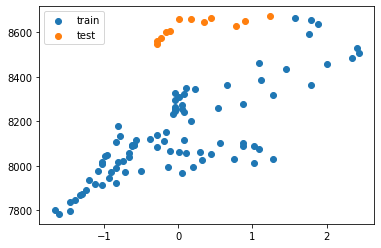

In [352]:
plt.scatter(train_x, train_y, label='train')
plt.scatter(test_x, test_y, label='test')
plt.legend(loc='best')
plt.show()

데이터 셋의 분포에 문제가 있었던 것으로 보인다.  
다만, 데이터셋이 매우 작았기에 생길수 있는 문제로 보인다.  

# 그 이후

이제 여러분들은 한번 모델을 만들어보고 fitting한 다음 예측까지 해보셨습니다.

이제 개선하기 위해 1.데이터부터 5.성능평가 중 수정, 변경하실 부분을 업데이트 해서  최적의 모델을 찾아보세요!

현재 사용하고 있는 scaler, model부터 전처리과정 기타 여러 조건을 조작해보시고 어떤 효과가 있는지 한번 보시고 알려주세요:D

고생하셨습니다!